#  <center>Natural Language Processing with Disaster Tweets</center>
## <div style="text-align: right;"> ----5511 Week4 Project </div>


## 1. Brief description of the problem and data
### 1.1 Project goal
In this project, I will build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. 

### 1.2. Data description

**Files**

* train.csv - the training set
* test.csv - the test set
* sample_submission.csv - a sample submission file in the correct format

**Data format**

Each sample in the train and test set has the following information:

* The text of a tweet
* A keyword from that tweet (although this may be blank!)
* The location the tweet was sent from (may also be blank)

**Columns**
* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## 2. Exploratory Data Analysis (EDA) 

### 2.1. Data cleaning

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Data cleaning: fill missing values for 'keyword' and 'location' with 'unknown'
train_df['keyword'] = train_df['keyword'].fillna('unknown')
train_df['location'] = train_df['location'].fillna('unknown')

In [8]:
import re

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'\W', ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [9]:
# Preprocess data
train_df['text'] = train_df['text'].apply(preprocess_text)  #preprocess_text is a function to clean text

In [10]:
train_df.head()

,id,keyword,location,text,target
0,1,unknown,unknown,our deeds are the reason of this earthquake ma...,1
1,4,unknown,unknown,forest fire near la ronge sask canada,1
2,5,unknown,unknown,all residents asked to shelter in place are be...,1
3,6,unknown,unknown,people receive wildfires evacuation orders in ...,1
4,7,unknown,unknown,just got sent this photo from ruby alaska as s...,1


### 2.2. Data Visualizations

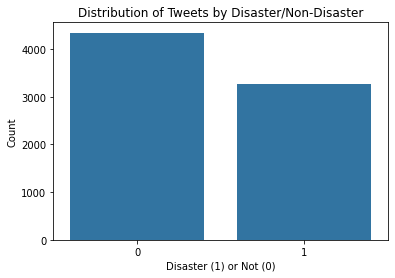

In [11]:
# Visualization 1: Histogram of target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Tweets by Disaster/Non-Disaster')
plt.xlabel('Disaster (1) or Not (0)')
plt.ylabel('Count')
plt.show()

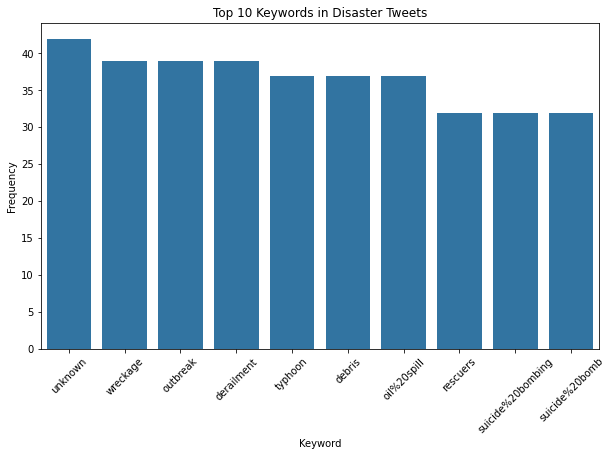

In [12]:
# Visualization 2: Top 10 Keywords in Disaster Tweets
top_keywords_disaster = train_df[train_df['target'] == 1]['keyword'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords_disaster.index, y=top_keywords_disaster.values)
plt.title('Top 10 Keywords in Disaster Tweets')
plt.xlabel('Keyword')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

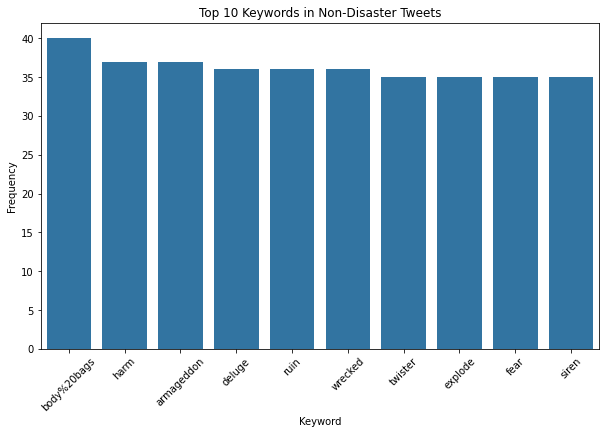

In [13]:
# Visualization 3: Top 10 Keywords in Non-Disaster Tweets
top_keywords_non_disaster = train_df[train_df['target'] == 0]['keyword'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords_non_disaster.index, y=top_keywords_non_disaster.values)
plt.title('Top 10 Keywords in Non-Disaster Tweets')
plt.xlabel('Keyword')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

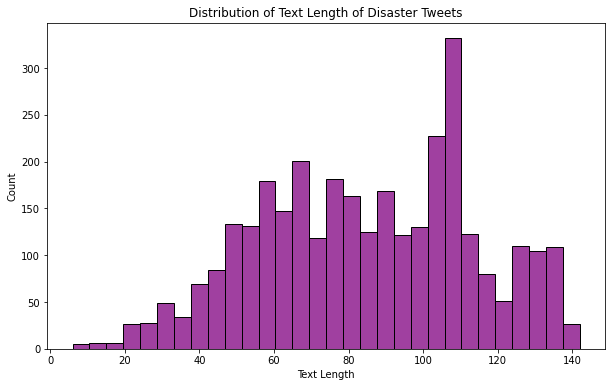

In [18]:
# Visualization 4. Histogram of text length distribution of disaster tweets
train_df['Text Length'] = train_df[train_df['target']==1]['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Text Length'], bins=30, color='purple')
plt.title('Distribution of Text Length of Disaster Tweets')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

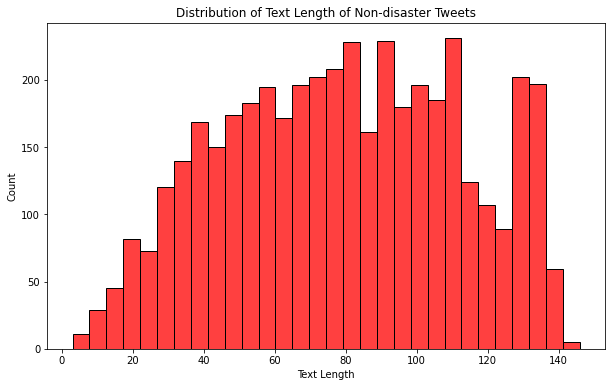

In [20]:
# Visualization 5. Histogram of text length distribution of non-disaster Tweets
train_df['Text Length'] = train_df[train_df['target']==0]['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Text Length'], bins=30, color='red')
plt.title('Distribution of Text Length of Non-disaster Tweets')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

### 2.3. Plan of analysis:

Based on the exploratory data analysis (EDA), I would proceed as follows:

* **Preprocessing**: Clean and preprocess the text data to make it suitable for modeling. This includes removing noise like URLs, HTML tags, special characters, and numbers. Additionally, we will standardize the text by converting it to lowercase and removing stopwords(already done in previous steps).
* **Feature Extraction**: Convert the cleaned text into a suitable format for machine learning models. I will use a word embedding technique to capture semantic meanings of words.
* **Model Architecture**: Implement a recurrent neural network (RNN) based model, specifically using Long Short-Term Memory (LSTM) units. LSTMs are effective for sequence prediction problems because they can capture long-term dependencies in sequence data, which is beneficial for understanding the context in tweets.
* **Model Training and Evaluation**: Train the model on the processed dataset and evaluate its performance using appropriate metrics (e.g., accuracy, F1 score). Adjust hyperparameters as necessary to improve performance.

## 3. Model architecture, results, and analysis

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

2024-04-27 09:58:12.066382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])
sequences = tokenizer.texts_to_sequences(train_df['text'])
X = pad_sequences(sequences, maxlen=100)  # Assuming 100 as maximum length of sequences
y = train_df['target'].values

In [24]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1. Basic LSTM model

In [25]:
# Define the model
model_LSTM = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [26]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
history_LSTM = model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.6136 - loss: 0.6514 - val_accuracy: 0.7919 - val_loss: 0.4690
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8362 - loss: 0.3845 - val_accuracy: 0.7630 - val_loss: 0.4749
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8854 - loss: 0.2949 - val_accuracy: 0.7991 - val_loss: 0.4722
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9023 - loss: 0.2402 - val_accuracy: 0.7800 - val_loss: 0.5599
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9335 - loss: 0.1843 - val_accuracy: 0.7787 - val_loss: 0.6301
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9463 - loss: 0.1500 - val_accuracy: 0.7571 - val_loss: 0.6896
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9615 - loss: 0.1219 - val_accuracy: 0.7485 - val_loss: 0.7650
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9608 - loss: 0.1041 - val_accuracy: 0.7479 -

In [28]:
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,269 (4.04 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 706,180 (2.69 MB)

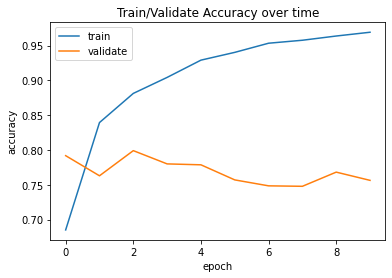

In [29]:
# plot accuracy (train/val) history
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

From the plot, it appears that basic LSTM model for text classification is showing signs of overfitting. Overfitting happens when the model learns patterns specific to the training data, which do not generalize well to unseen data. This is indicated by the fact that the accuracy on the training set continues to increase over epochs, while the validation accuracy plateaus early and does not improve significantly.

To improve the model, I will first add dropout layers. Incorporating dropout layers can help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps to prevent neurons from co-adapting too much.

### 3.2. LSTM model with dropout layer

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
# Define the model
model_LSTM2 = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(64, dropout=0.2),  # Add dropout to LSTM layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model_LSTM2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_LSTM2 = model_LSTM2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.6173 - loss: 0.6472 - val_accuracy: 0.8011 - val_loss: 0.4583
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8431 - loss: 0.3794 - val_accuracy: 0.8142 - val_loss: 0.4462
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8916 - loss: 0.2794 - val_accuracy: 0.7905 - val_loss: 0.4813
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9094 - loss: 0.2350 - val_accuracy: 0.7925 - val_loss: 0.5368
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9284 - loss: 0.1884 - val_accuracy: 0.7669 - val_loss: 0.6026
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9436 - loss: 0.1612 - val_accuracy: 0.7761 - val_loss: 0.6606
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9491 - loss: 0.1432 - val_accuracy: 0.7748 - val_loss: 0.7092
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9534 - loss: 0.1343 - val_accuracy: 0.7525

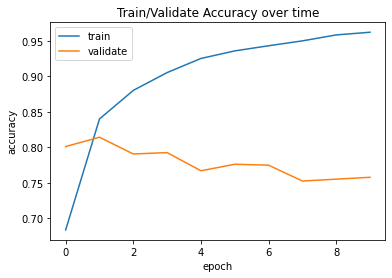

In [32]:
# plot accuracy (train/val) history
plt.plot(history_LSTM2.history['accuracy'])
plt.plot(history_LSTM2.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### 3.3. LSTM model with less units

In [33]:
# Define the model
model_LSTM3 = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(32, dropout=0.2),  # Reduced from 64 to 32 units
    Dense(1, activation='sigmoid')
])

# Compile the model
model_LSTM3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_LSTM3 = model_LSTM3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5868 - loss: 0.6553 - val_accuracy: 0.7794 - val_loss: 0.4797
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.8329 - loss: 0.3998 - val_accuracy: 0.8135 - val_loss: 0.4381
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8889 - loss: 0.2905 - val_accuracy: 0.8096 - val_loss: 0.4633
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9044 - loss: 0.2521 - val_accuracy: 0.7820 - val_loss: 0.5177
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9279 - loss: 0.2068 - val_accuracy: 0.7695 - val_loss: 0.5698
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9403 - loss: 0.1686 - val_accuracy: 0.7741 - val_loss: 0.5956
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9517 - loss: 0.1476 - val_accuracy: 0.7525 - val_loss: 0.6883
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9597 - loss: 0.1297 - val_accuracy: 0.7768 - v

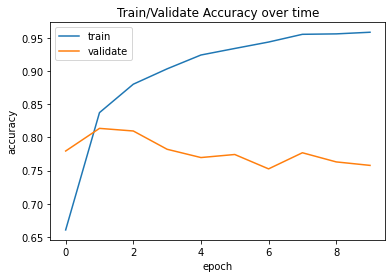

In [34]:
# plot accuracy (train/val) history
plt.plot(history_LSTM3.history['accuracy'])
plt.plot(history_LSTM3.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### 3.4. Stacked LSTM model

In [35]:
# Define the model
model_stack_LSTM = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(64, dropout=0.2, return_sequences=True),  # first LSTM layer
    LSTM(32, dropout=0.2, return_sequences=False),  # second LSTM layer, reduced number of units
    Dense(1, activation='sigmoid')
])

# Compile the model
model_stack_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_stacked_LSTM = model_stack_LSTM.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.6019 - loss: 0.6528 - val_accuracy: 0.7965 - val_loss: 0.4591
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.8408 - loss: 0.3920 - val_accuracy: 0.7984 - val_loss: 0.4503
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.8820 - loss: 0.2988 - val_accuracy: 0.8102 - val_loss: 0.4669
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9089 - loss: 0.2450 - val_accuracy: 0.7899 - val_loss: 0.5086
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.9235 - loss: 0.2146 - val_accuracy: 0.7840 - val_loss: 0.6119
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.9363 - loss: 0.1652 - val_accuracy: 0.7682 - val_loss: 0.5939
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9501 - loss: 0.1451 - val_accuracy: 0.7571 - val_loss: 0.6983
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9622 - loss: 0.1187 - val_accu

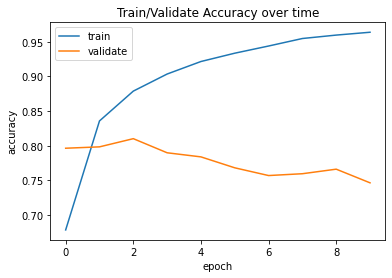

In [36]:
# plot accuracy (train/val) history
plt.plot(history_stacked_LSTM.history['accuracy'])
plt.plot(history_stacked_LSTM.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### 3.5. GRU model

In [38]:
from tensorflow.keras.layers import GRU

# Define the model
model_GRU = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    GRU(64),  # Using GRU layer instead of LSTM
    Dense(1, activation='sigmoid')
])

# Compile the model
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_GRU = model_GRU.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.6108 - loss: 0.6461 - val_accuracy: 0.7971 - val_loss: 0.4532
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8484 - loss: 0.3627 - val_accuracy: 0.7965 - val_loss: 0.4658
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8915 - loss: 0.2687 - val_accuracy: 0.7695 - val_loss: 0.5338
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9228 - loss: 0.2057 - val_accuracy: 0.7663 - val_loss: 0.6101
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9358 - loss: 0.1649 - val_accuracy: 0.7735 - val_loss: 0.6631
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9483 - loss: 0.1361 - val_accuracy: 0.7525 - val_loss: 0.7436
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9619 - loss: 0.1057 - val_accuracy: 0.7223 - val_loss: 0.8755
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9670 - loss: 0.0975 - val_accuracy: 0.7400 -

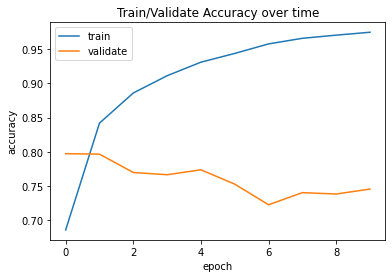

In [39]:
# plot accuracy (train/val) history
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### 3.6. Final model

I've tried various strategies but still observe a similar pattern of overfitting where the training accuracy continues to improve while the validation accuracy plateaus or decreases, so I will mplement early stopping during training. This stops the training process once the model performance stops improving on the validation set.

In [40]:
 from keras.callbacks import EarlyStopping 

In [41]:
# Define the model
model_final = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(32, dropout=0.2),  # Add dropout to LSTM layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_final = model_final.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]  # Add early stopping callback
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.5981 - loss: 0.6578 - val_accuracy: 0.7866 - val_loss: 0.4835
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8325 - loss: 0.3988 - val_accuracy: 0.8089 - val_loss: 0.4411
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8836 - loss: 0.3049 - val_accuracy: 0.8056 - val_loss: 0.4668
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9099 - loss: 0.2461 - val_accuracy: 0.7892 - val_loss: 0.5133
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9300 - loss: 0.1985 - val_accuracy: 0.7768 - val_loss: 0.5601


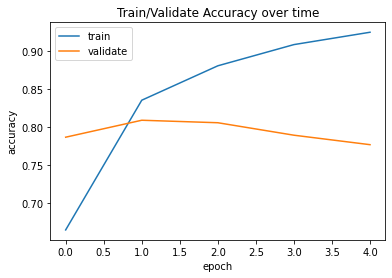

In [42]:
# plot accuracy (train/val) history
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('Train/Validate Accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### 3.7. Submission

In [43]:
# Data cleaning: fill missing values for 'keyword' and 'location' with 'unknown'
test_df['keyword'] = test_df['keyword'].fillna('unknown')
test_df['location'] = test_df['location'].fillna('unknown')

# Preprocess data
test_df['text'] = test_df['text'].apply(preprocess_text)  # preprocess_text is a function to clean text

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(test_df['text'])
sequences = tokenizer.texts_to_sequences(test_df['text'])
X_test = pad_sequences(sequences, maxlen=100)  # Assuming 100 as maximum length of sequences
y_hat = model_final.predict(X_test).round().astype('int')

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [44]:
predictions = np.transpose(y_hat)[0]
submission = pd.read_csv("sample_submission.csv")
submission['id'] = test_df['id']
submission['target'] = predictions
submission.to_csv('submission.csv', index=False)

## 4. Summary and conclusion

I began with a basic LSTM model and then experimented with various adjustments:

* Added a dropout layer.
* Reduced the number of LSTM units.
* Added an extra LSTM layer.
* Implemented early stopping to mitigate overfitting.

Additionally, I explored a GRU model. However, despite these strategies, a consistent pattern of overfitting emerged. While the training accuracy continued to rise, the validation accuracy plateaued at 80%.

The final iteration of my model achieved a score of **0.74765** on the test dataset, indicating satisfactory performance. Nevertheless, there are potential reasons for the observed limitations and avenues for enhancement:

* **Data Quality and Relevance:**
Ensure the data is clean, relevant, and representative. Check for any data preprocessing errors.
Investigate if there is any bias in the training data that might not be present in the validation data.

* **Feature Representation:**
Re-evaluate the features being used by the model. Check if there are different or additional features that could better capture the patterns necessary for the classification.
Consider using other word embeddings like Word2Vec, GloVe, or embeddings from transformer models, which might capture semantic relationships more effectively.

* **Hyperparameter Optimization:**
Fine-tuning hyperparameters can have a significant impact. Even after trying multiple configurations, the hyperparameters might still not be optimal.
I will consider using methods like grid search, random search, or Bayesian optimization to systematically explore the hyperparameter space.

## References

* https://www.kaggle.com/code/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm#EDA-and-Preprocessing
* https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#9.-NLP:-Disaster-Tweets
* https://www.kaggle.com/code/sandhyakrishnan02/nlp-with-disaster-tweets-using-lstm